<a href="https://colab.research.google.com/github/adrimexico1/SVM-spam-ham/blob/main/M%C3%A1quinas_de_Vectores_de_Soporte_(SVMs)_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

=== SVM Lineal ===
Accuracy: 0.9866666666666667
              precision    recall  f1-score   support

         ham       0.99      0.99      0.99        75
        spam       0.99      0.99      0.99        75

    accuracy                           0.99       150
   macro avg       0.99      0.99      0.99       150
weighted avg       0.99      0.99      0.99       150

=== SVM RBF ===
Accuracy: 0.9866666666666667
              precision    recall  f1-score   support

         ham       0.99      0.99      0.99        75
        spam       0.99      0.99      0.99        75

    accuracy                           0.99       150
   macro avg       0.99      0.99      0.99       150
weighted avg       0.99      0.99      0.99       150



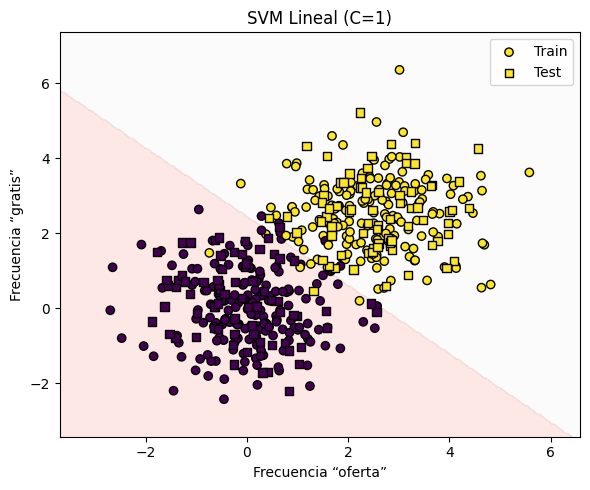

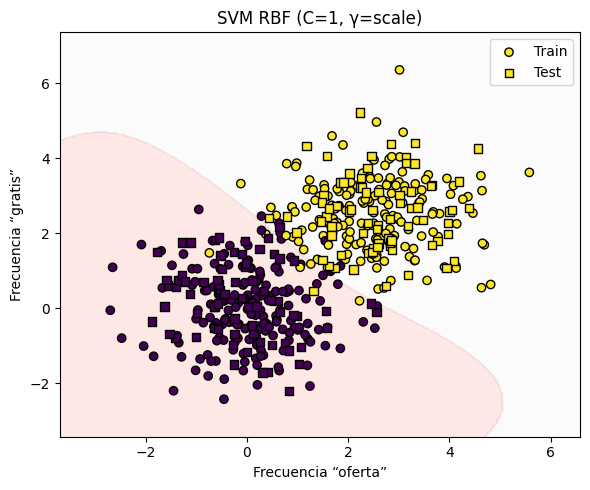

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# 1) Simular frecuencias de dos palabras clave en correos spam vs ham
rng = np.random.RandomState(42)
X_spam = rng.normal(loc=2.5, scale=1.0, size=(250, 2))   # spam: alta frecuencia
X_ham  = rng.normal(loc=0.0, scale=1.0, size=(250, 2))   # ham: baja frecuencia
X = np.vstack([X_spam, X_ham])
y = np.hstack([np.ones(X_spam.shape[0]), np.zeros(X_ham.shape[0])])

# 2) Dividir en entrenamiento (70 %) y prueba (30 %)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

# 3) Entrenar SVM lineal y SVM RBF
clf_lin = SVC(kernel='linear', C=1.0)
clf_rbf = SVC(kernel='rbf',    C=1.0, gamma='scale')
clf_lin.fit(X_train, y_train)
clf_rbf.fit(X_train, y_train)

# 4) Evaluar y mostrar métricas
for name, clf in [("SVM Lineal", clf_lin), ("SVM RBF", clf_rbf)]:
    y_pred = clf.predict(X_test)
    print(f"=== {name} ===")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(
        y_test, y_pred,
        target_names=["ham","spam"],
        digits=2
    ))

# 5) Función para graficar frontera de decisión
def plot_decision(clf, title):
    x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
    y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 300),
        np.linspace(y_min, y_max, 300)
    )
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    plt.figure(figsize=(6,5))
    # fondo coloreado: región donde el modelo predice ham (violeta) o spam (amarillo)
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Pastel1)
    # puntos de entrenamiento (círculos) y de prueba (cuadrados)
    plt.scatter(X_train[:,0], X_train[:,1], c=y_train, marker='o',
                edgecolor='k', label='Train')
    plt.scatter(X_test[:,0],  X_test[:,1],  c=y_test,  marker='s',
                edgecolor='k', label='Test')
    plt.title(title)
    plt.xlabel('Frecuencia “oferta”')
    plt.ylabel('Frecuencia “gratis”')
    plt.legend()
    plt.tight_layout()
    plt.show()

# 6) Mostrar las gráficas
plot_decision(clf_lin, 'SVM Lineal (C=1)')
plot_decision(clf_rbf, 'SVM RBF (C=1, γ=scale)')
